# 1. Preprocesamiento: lógica de limpieza

# Importación de matplotlib para visualizaciones

In [25]:
import matplotlib.pyplot as plt

# Importar librería

In [26]:
from datasets import load_dataset
import pandas as pd
import re

# Carga del dataset de Amazon Reviews

In [27]:
dataset = load_dataset("SetFit/amazon_reviews_multi_es", split="train")
df = dataset.to_pandas()

Repo card metadata block was not found. Setting CardData to empty.


# Muestra de trabajo (5.000 registros)

In [28]:
df_sample = df.sample(n=5000, random_state=42)

df_sample.shape

(5000, 4)

# Inspección inicial de los textos

In [29]:
df_sample['text'].iloc[0]

'Mini usb cable de carga defectuoso por lo cual se estropearon los usb de las baterias'

# Definición de la función clean_text

In [30]:
import re

def clean_text(text):
    text = text.lower()                          # convertir a minúsculas
    text = re.sub(r'<.*?>', '', text)            # eliminar etiquetas HTML
    text = re.sub(r'http\S+|www\S+', '', text)   # eliminar URLs
    text = re.sub(r'[^a-záéíóúñü\s]', '', text)  # eliminar signos y emojis
    text = re.sub(r'\s+', ' ', text).strip()     # eliminar espacios extra
    return text

# Prueba de la función clean_text

In [31]:
ejemplo = "¡Excelente servicio! 😍"
clean_text(ejemplo)

'excelente servicio'

# Aplicación de la función clean_text al dataset

In [32]:
df_sample['text_clean'] = df_sample['text'].apply(clean_text)

# Verificación antes y después de la limpieza

In [33]:
df_sample[['text', 'text_clean']].head(5)

,text,text_clean
119737,Mini usb cable de carga defectuoso por lo cual...,mini usb cable de carga defectuoso por lo cual...
72272,El cable es muy largo y es comodo pero me duró...,el cable es muy largo y es comodo pero me duró...
158154,Ideal para mis necesidades.,ideal para mis necesidades
65426,"Es desigual el color, y mancha. El hilo de rom...",es desigual el color y mancha el hilo de rompe...
30074,Los comentarios se hacen cuando uno recibe la ...,los comentarios se hacen cuando uno recibe la ...


# 2. Homologación: Transformar la escala de Amazon

# Inspección de etiquetas originales

In [34]:
df_sample['label'].value_counts().sort_index()

,count
label,
0,1007
1,982
2,1003
3,987
4,1021


# Función para homologar etiquetas a binario

In [35]:
def map_label_binary(label):
    if label <= 1:
        return "Negativo"
    else:
        return "Positivo"

# Aplicación de la homologación de etiquetas

In [36]:
df_sample['label_bin'] = df_sample['label'].apply(map_label_binary)

# Verificación de distribución binaria

In [37]:
df_sample['label_bin'].value_counts()

,count
label_bin,
Positivo,3011
Negativo,1989


# Visualización de la distribución binaria

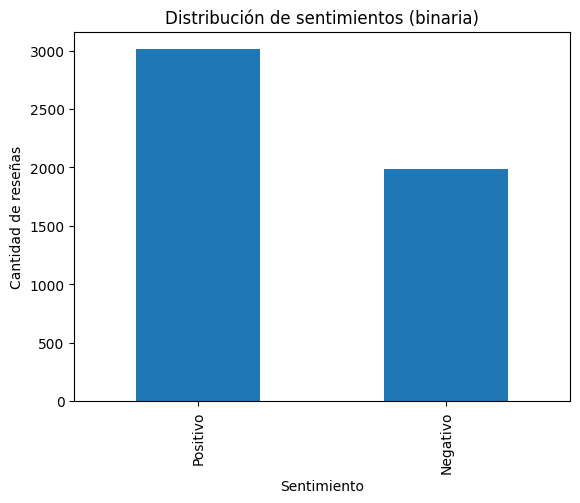

In [38]:
df_sample['label_bin'].value_counts().plot(kind='bar')
plt.title('Distribución de sentimientos (binaria)')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de reseñas')
plt.show()

# Exportación del dataset procesado para ML

In [39]:
df_final = df_sample[['text_clean', 'label_bin']]
df_final.head()

,text_clean,label_bin
119737,mini usb cable de carga defectuoso por lo cual...,Positivo
72272,el cable es muy largo y es comodo pero me duró...,Negativo
158154,ideal para mis necesidades,Positivo
65426,es desigual el color y mancha el hilo de rompe...,Negativo
30074,los comentarios se hacen cuando uno recibe la ...,Negativo


# Verificar tamaño final

In [40]:
df_final.shape

(5000, 2)

# Exportar a CSV

In [41]:
df_final.to_csv(
    'amazon_reviews_es_5000_clean.csv',
    index=False,
    encoding='utf-8-sig'
)


# Descargar el archivo

In [42]:
from google.colab import files
files.download('amazon_reviews_es_5000_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>